 # Project 1 - Item Sales

### Historical Sales Data

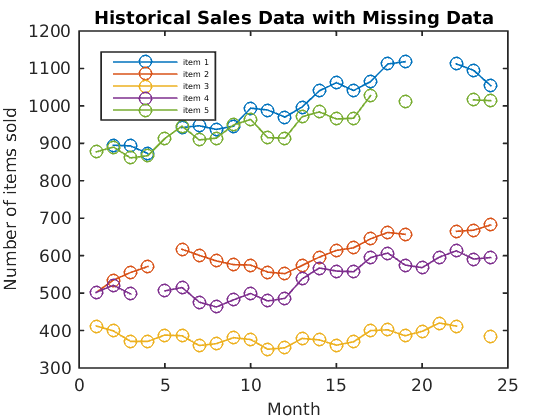

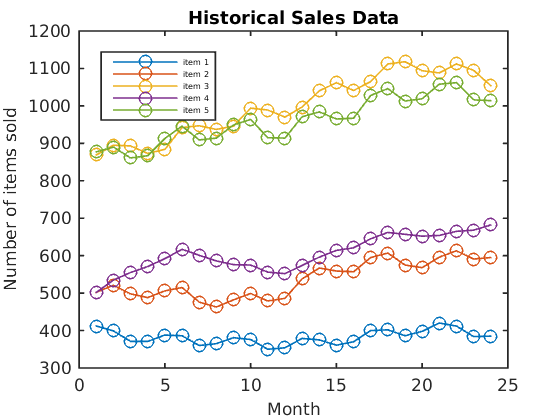

In [28]:
load('DS.mat');
figure;
plot(ds1','-o');
xlabel('Month', 'FontSize', 8); 
ylabel('Number of items sold', 'FontSize', 8);
title('Historical Sales Data');
leg = legend('item 1','item 2','item 3','item 4','item 5');
set(leg,'FontSize', 4,'Location','northwest');
set(gca,'FontSize',8);

figure;
plot(ds2','-o');
xlabel('Month', 'FontSize', 8); 
ylabel('Number of items sold', 'FontSize', 8);
title('Historical Sales Data with Missing Data');
leg = legend('item 1','item 2','item 3','item 4','item 5');
set(leg,'FontSize', 4,'Location','northwest');
set(gca,'FontSize',8);

### Contstruction of the Basis

In [ ]:
function A = constructBasis(dataSet,seasonLength)

[numOfItems, numOfMonths] = size(dataSet);
A = zeros(numOfMonths-1,1+seasonLength,numOfItems);

for i=1:numOfItems
    itemSales = dataSet(i,:);
    A(:,1,i) = itemSales(2:end);
    for j=1:seasonLength
        A(j:seasonLength:end,j+1,i)=1;
    end
end

end

In [29]:
seasonLength=4;
A = constructBasis(ds1,seasonLength);

### Prediction Errors

In [ ]:
function [NormE, QR, SVD] = predictionError(dataSet,A,seasonLength,predictionLength)
[numOfItems, numOfMonths] = size(dataSet);

NormE = zeros(predictionLength,numOfItems);
QR = zeros(predictionLength,numOfItems);
SVD = zeros(predictionLength,numOfItems);
for i=1:numOfItems
    b = dataSet(i,1:end-1)';
    % Normal Equations
    params = linsolve(A(:,:,i),b);
    predictions = zeros(predictionLength,1);
    a = zeros(1,seasonLength+1);
    for t=1:predictionLength
        if t==1, a(1)=A(end,1,i); else a(1)=predictions(t-1); end
        for s=1:seasonLength
            a(s+1) = mod(numOfMonths+t,seasonLength) == s;
        end
        predictions(t) = a*params;
    end
    NormE(:,i) = predictions;
    
    % QR Decomposition
    [Q R] = qr(A(:,:,i),0);
    opts.UT = true;
    params = linsolve(R,Q'*b,opts);
    predictions = zeros(predictionLength,1);
    a = zeros(1,seasonLength+1);
    for t=1:predictionLength
        if t==1, a(1)=A(end,1,i); else a(1)=predictions(t-1); end
        for s=1:seasonLength
            a(s+1) = mod(numOfMonths+t,seasonLength) == s;
        end
        predictions(t) = a*params;
    end
    QR(:,i) = predictions';
    
    % SVD Decomposition
    [U S V] = svd(A(:,:,i),0);
    S_inv = 1./S;
    S_inv(isinf(S_inv)) = 0;
    params = V*S_inv*U'*b;
    predictions = zeros(predictionLength,1);
    a = zeros(1,seasonLength+1);
    for t=1:predictionLength
        if t==1, a(1)=A(end,1,i); else a(1)=predictions(t-1); end
        for s=1:seasonLength
            a(s+1) = mod(numOfMonths+t,seasonLength) == s;
        end
        predictions(t) = a*params;
    end
    SVD(:,i) = predictions';
    fprintf('Item: %d \n',i);
    header = ['Total relative error between predictions generated by different computational methods\n' ...
    'NormE: Normal Equations\n' ...
    'QR : QR decomposition\n' ...
    'SVD : SVD Decomposition\n'];
    fprintf(header);

    table_header = '\t NormE \t\t QR \t\t SVD\n';
    fprintf(table_header);
    row1 = 'NormE: \t %E \t %E \t %E \n';
    fprintf(row1,0,norm(NormE(:,i)-QR(:,i))/norm(QR(:,i)),norm(NormE(:,i)-SVD(:,i))/norm(SVD(:,i)));
    row2 = 'QR: \t %E \t %E \t %E \n';
    fprintf(row2,norm(QR(:,i)-NormE(:,i))/norm(NormE(:,i)),0,norm(QR(:,i)-SVD(:,i))/norm(SVD(:,i)));
    row3 = 'SVD: \t %E \t %E \t %E \n\n';
    fprintf(row3,norm(SVD(:,i)-NormE(:,i))/norm(NormE(:,i)),norm(SVD(:,i)-QR(:,i))/norm(QR(:,i)),0);

end

end

In [31]:
predictionLength=6;
[NormE, QR, SVD] = predictionError(ds1,A,seasonLength,predictionLength);

Item: 1 
Total relative error between predictions generated by different computational methods
NormE: Normal Equations
QR : QR decomposition
SVD : SVD Decomposition
	 NormE 		 QR 		 SVD
NormE: 	 0.000000E+00 	 1.336903E-15 	 3.261538E-14 
QR: 	 1.336903E-15 	 0.000000E+00 	 3.132544E-14 
SVD: 	 3.261538E-14 	 3.132544E-14 	 0.000000E+00 

Item: 2 
Total relative error between predictions generated by different computational methods
NormE: Normal Equations
QR : QR decomposition
SVD : SVD Decomposition
	 NormE 		 QR 		 SVD
NormE: 	 0.000000E+00 	 1.415829E-15 	 4.957889E-15 
QR: 	 1.415829E-15 	 0.000000E+00 	 6.353025E-15 
SVD: 	 4.957889E-15 	 6.353025E-15 	 0.000000E+00 

Item: 3 
Total relative error between predictions generated by different computational methods
NormE: Normal Equations
QR : QR decomposition
SVD : SVD Decomposition
	 NormE 		 QR 		 SVD
NormE: 	 0.000000E+00 	 1.398944E-15 	 8.935188E-16 
QR: 	 1.398944E-15 	 0.000000E+00 	 6.236604E-16 
SVD: 	 8.935188E-16 	 6.23660

### Predictions

In [ ]:
function predictions = project1(salesdata1,varargin)

seasonLength=4;
predictionLength=6;
[numOfItems, numOfMonths] = size(salesdata1);
A = zeros(numOfMonths-1,1+seasonLength,numOfItems);

predictions = zeros(numOfItems,predictionLength);
for i=1:numOfItems
    
    % Construct the basis
    A(:,1,i) = salesdata1(i,2:end);
    for j=1:seasonLength
        A(j:seasonLength:end,j+1,i)=1;
    end
    
    b = salesdata1(i,1:end-1)';
    % Least Squares
    if sum(sum(isnan(A(:,:,i)))) + sum(isnan(b)) > 0
        params = lsMissing(A(:,:,i),b);
    else
        params = A(:,:,i)\b;
    end
    a = zeros(1,seasonLength+1);
    for t=1:predictionLength
        if t==1, a(1)=A(end,1,i); else a(1)=predictions(i,t-1); end
        for s=1:seasonLength
            a(s+1) = mod(numOfMonths+t,seasonLength) == s;
        end
        predictions(i,t) = a*params;
    end
end

if nargin > 1
    testdata1 = varargin{1};
    fprintf('Errors (Euclidian norms)\n');
    totalError = 0;
    for i=1:numOfItems
        error = norm(predictions(i,:)-testdata1(i,:));
        fprintf('Item %d: %f\n',i,error);
        totalError = totalError + error;
    end
    fprintf('Total : %f\n\n',totalError);
end

end


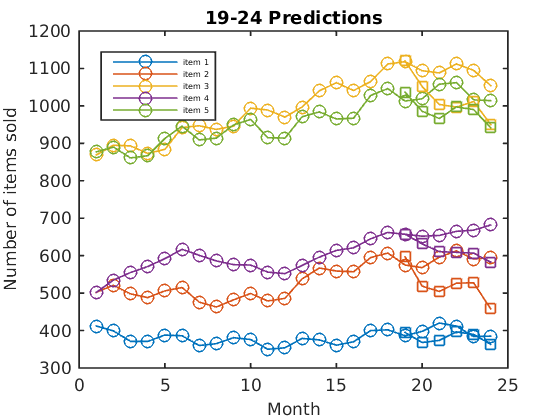

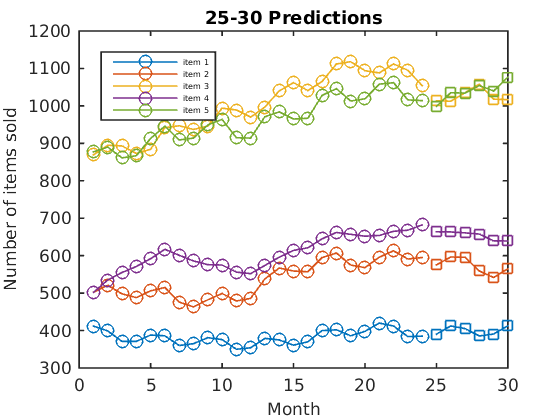

Errors (Euclidian norms)
Item 1: 62.279460
Item 2: 203.911726
Item 3: 199.743703
Item 4: 138.174648
Item 5: 142.100608
Total : 746.210144


In [32]:
predictions = project1(ds1);
figure;
plot(ds1','-o');
hold on;
ax = gca;
ax.ColorOrderIndex = 1;
plot(25:30,predictions','-s');
xlabel('Month', 'FontSize', 8); 
ylabel('Number of items sold', 'FontSize', 8);
leg = legend('item 1','item 2','item 3','item 4','item 5');
set(leg,'FontSize', 4,'Location','northwest');
set(gca,'FontSize',8);
title('25-30 Predictions');

predictions = project1(ds1(:,1:18),ds1(:,19:end));
figure;
plot(ds1','-o');
hold on;
ax = gca;
ax.ColorOrderIndex = 1;
plot(19:24,predictions','-s');
hold off;
xlabel('Month', 'FontSize', 8); 
ylabel('Number of items sold', 'FontSize', 8);
leg = legend('item 1','item 2','item 3','item 4','item 5');
set(leg,'FontSize', 4,'Location','northwest');
set(gca,'FontSize',8);
title('19-24 Predictions');

### Part II

In [ ]:
function [w, pred] = project_part2(D_tau, salesdata1, varargin)
[numOfItems, numOfMonths] = size(salesdata1);
A = zeros(numOfMonths-D_tau,D_tau*numOfItems,numOfItems);

pred = zeros(numOfItems,1);
w = zeros(numOfItems,numOfItems,D_tau);
for i=1:numOfItems
    % Construct the basis
    for t=1:D_tau
        A(:,(t-1)*numOfItems+1:t*numOfItems,i) = salesdata1(:,t:end-D_tau+t-1)';
    end
    % Least Squares
    b = salesdata1(i,D_tau+1:end)';
    if sum(sum(isnan(A(:,:,i)))) + sum(isnan(b)) > 0
        params = lsMissing(A(:,:,i),b);
    else
        params = A(:,:,i)\b;
    end
    for t=1:D_tau
        w(i,:,t) = params((t-1)*numOfItems+1:t*numOfItems);
    end
    % Estimate
    a = zeros(1,D_tau*numOfItems);
    for t=1:D_tau
        a((t-1)*numOfItems+1:t*numOfItems) = salesdata1(:,end-D_tau+t)';
    end
    pred(i,1) = a*params;
end

if nargin > 2
    testdata1 = varargin{1};
    fprintf('Errors (Euclidian norms)\n');
    totalError = 0;
    for i=1:numOfItems
        error = norm(pred(i,1)-testdata1(i,1));
        fprintf('Item %d: %f\n',i,error);
        totalError = totalError + error;
    end
    fprintf('Total : %f\n\n',totalError);
end

end

### Predictions

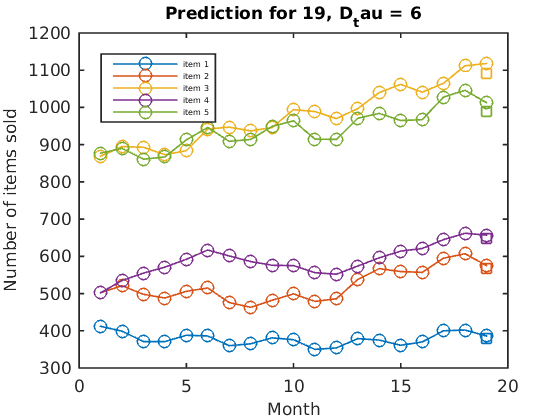

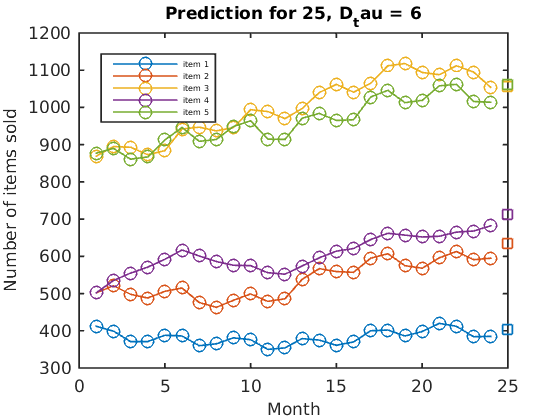

w(:,:,1) =

   -0.9609    0.6744    0.0393   -1.5262    0.9949
   -0.5698    0.9292    0.5794   -1.7260    0.3523
   -4.0773    1.3088   -0.7738   -4.3384    4.3984
   -1.0851    0.8873    0.4093   -2.1896    1.0041
   -3.2951    2.0460   -0.2602   -4.0013    2.9645


w(:,:,2) =

         0   -0.1833         0         0    0.5666
         0   -2.1569         0         0    1.5004
         0   -1.0189         0         0    1.9364
         0   -2.0844         0         0    1.5765
         0   -1.5903         0         0    1.9943


w(:,:,3) =

         0    0.2282   -1.4346    0.2697    1.2689
         0   -0.1633   -0.2726    0.9125   -0.0836
         0    0.6801   -3.0734    1.4905    2.2917
         0    0.2147   -0.4247    1.1198   -0.1476
         0    0.2741   -3.2304    1.1932    2.7323


w(:,:,4) =

         0         0    0.3149    0.1640   -0.4472
         0         0    1.0327    0.1189   -0.9211
         0         0    0.6924    0.3240   -1.1672
         0         0    0.35

In [33]:
% Read txt files
ds1 = dlmread('ds1.txt');
ds2 = dlmread('ds2.txt');
[w, pred] = project_part2(6, ds1)
figure;
plot(ds1','-o');
hold on;
ax = gca;
ax.ColorOrderIndex = 1;
plot(25,pred','-s');
xlabel('Month', 'FontSize', 8); 
ylabel('Number of items sold', 'FontSize', 8);
leg = legend('item 1','item 2','item 3','item 4','item 5');
set(leg,'FontSize', 4,'Location','northwest');
set(gca,'FontSize',8);
title('Prediction for 25, D_tau = 6');

[w, pred] = project_part2(6, ds1(:,1:18),ds1(:,19))
figure;
plot(ds1(:,1:19)','-o');
hold on;
ax = gca;
ax.ColorOrderIndex = 1;
plot(19,pred','-s');
hold off;
xlabel('Month', 'FontSize', 8); 
ylabel('Number of items sold', 'FontSize', 8);
leg = legend('item 1','item 2','item 3','item 4','item 5');
set(leg,'FontSize', 4,'Location','northwest');
set(gca,'FontSize',8);
title('Prediction for 19, D_tau = 6');

### Missing Data

In [ ]:
function x = lsMissing(A,b)
missA = isnan(A);
missb = isnan(b);

A(missA) = 0;
b(missb) = 0;

Aprev = A;
xprev = ones(size(A,2),1);

epsilon = 1e-10;
for t=1:1000
    x = A\b;
    
    [U, S, V] = svd(x,0);
    Sinv = 1./S;
    Sinv(isinf(Sinv)) = 0;
    Anew = b*V'*Sinv*U';
    A(missA) = Anew(missA);
    bnew = A*x;
    b(missb) = bnew(missb);
    
    if norm(A-Aprev,'fro') < epsilon || norm(xprev-x,'fro') < epsilon
        break;
    end
    Aprev = A;
    xprev = x;
    
end
end

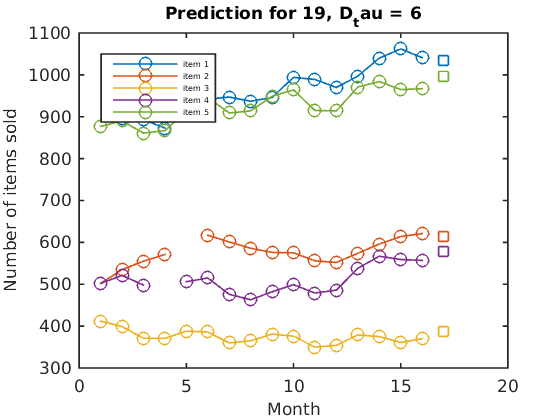

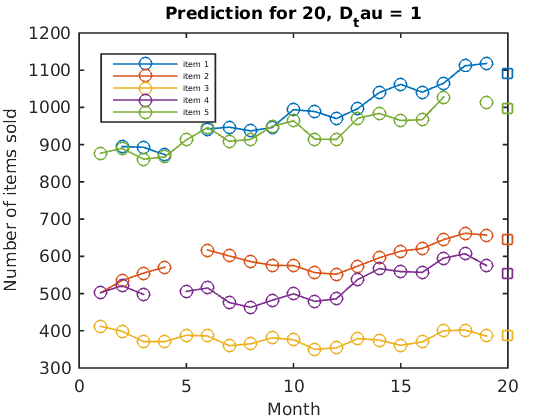

Errors (Euclidian norms)
Item 1: 31.018849
Item 2: 32.088886
Item 3: 13.750882
Item 4: 17.610296
Item 5: 32.963885
Total : 127.432799


In [34]:
ds1 = dlmread('ds1.txt');
ds2 = dlmread('ds2.txt');
[w, pred] = project_part2(1, ds2(:,1:19));
figure;
plot(ds2(:,1:19)','-o');
hold on;
ax = gca;
ax.ColorOrderIndex = 1;
plot(20,pred','-s');
xlabel('Month', 'FontSize', 8); 
ylabel('Number of items sold', 'FontSize', 8);
leg = legend('item 1','item 2','item 3','item 4','item 5');
set(leg,'FontSize', 4,'Location','northwest');
set(gca,'FontSize',8);
title('Prediction for 20, D_tau = 1');

[w, pred] = project_part2(6, ds2(:,1:16),ds2(:,17));
figure;
plot(ds2(:,1:16)','-o');
hold on;
ax = gca;
ax.ColorOrderIndex = 1;
plot(17,pred','-s');
hold off;
xlabel('Month', 'FontSize', 8); 
ylabel('Number of items sold', 'FontSize', 8);
leg = legend('item 1','item 2','item 3','item 4','item 5');
set(leg,'FontSize', 4,'Location','northwest');
set(gca,'FontSize',8);
title('Prediction for 19, D_tau = 6');